In [1]:
from google.colab import files
files.upload()

Saving sqli.csv to sqli.csv


{'sqli.csv': b'\xff\xfeS\x00e\x00n\x00t\x00e\x00n\x00c\x00e\x00,\x00L\x00a\x00b\x00e\x00l\x00\n\x00a\x00,\x001\x00\n\x00a\x00\'\x00 \x00,\x001\x00\n\x00a\x00\'\x00 \x00-\x00-\x00,\x001\x00\n\x00a\x00\'\x00 \x00o\x00r\x00 \x001\x00 \x00=\x00 \x001\x00;\x00 \x00-\x00-\x00,\x001\x00\n\x00@\x00,\x001\x00\n\x00?\x00,\x001\x00\n\x00\'\x00 \x00a\x00n\x00d\x00 \x001\x00 \x00=\x00 \x000\x00 \x00)\x00 \x00 \x00u\x00n\x00i\x00o\x00n\x00 \x00a\x00l\x00l\x00,\x001\x00\n\x00?\x00 \x00o\x00r\x00 \x001\x00 \x00=\x00 \x001\x00 \x00-\x00-\x00,\x001\x00\n\x00x\x00\'\x00 \x00a\x00n\x00d\x00 \x00u\x00s\x00e\x00r\x00i\x00d\x00 \x00i\x00s\x00 \x00N\x00U\x00L\x00L\x00;\x00 \x00-\x00-\x00,\x001\x00\n\x00x\x00\'\x00 \x00a\x00n\x00d\x00 \x00e\x00m\x00a\x00i\x00l\x00 \x00i\x00s\x00 \x00N\x00U\x00L\x00L\x00;\x00 \x00-\x00-\x00,\x001\x00\n\x00a\x00n\x00y\x00t\x00h\x00i\x00n\x00g\x00\'\x00 \x00o\x00r\x00 \x00\'\x00x\x00\'\x00 \x00=\x00 \x00\'\x00x\x00,\x001\x00\n\x00x\x00\'\x00 \x00a\x00n\x00d\x00 \x001\x00 \x00=\x0

In [2]:
import glob
import time
import pandas as pd
import numpy as np
# from xml.dom import minidom
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import pandas as pd
df = pd.read_csv("sqli.csv",encoding='utf-16')

In [4]:
df.head()

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1


In [5]:
df.sample(5)

,Sentence,Label
1907,District Court Texas,0
2828,"Tourism: Descent Romans Beneath Cologne , sew...",0
2186,Mr Cook said: &quot; Following increases stam...,0
636,select * from users where id = 1 + @<@. union...,1
1366,"The work exploits local features, limited cap...",0


In [6]:
df.describe()

,Label
count,4200.000000
mean,0.268571
std,0.443269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df.Label.value_counts()

0    3072
1    1128
Name: Label, dtype: int64

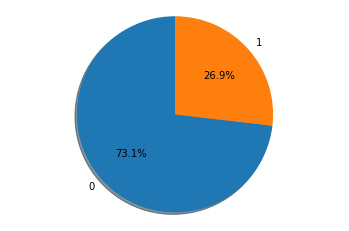

In [8]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(df.Label.value_counts(), labels=[0,1], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
# =df.Label.value_counts()

In [9]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( min_df=2, max_df=0.7, stop_words=stopwords.words('english'))
posts = vectorizer.fit_transform(df['Sentence'].values.astype('U')).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
transformed_posts=pd.DataFrame(posts)

In [11]:
df=pd.concat([df,transformed_posts],axis=1)

In [12]:
X=df[df.columns[2:]]

In [13]:
y=df['Label']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,solver="lbfgs").fit(X_train, y_train)
lr_score=clf.score(X_test,y_test)
print(lr_score)

0.9285714285714286


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
print(rf_score)

0.9119047619047619


In [20]:
from sklearn.naive_bayes import MultinomialNB
naive =MultinomialNB().fit(X_train,y_train)
naive_score=naive.score(X_test,y_test)
print(naive_score)

0.9178571428571428


In [21]:
from sklearn.svm import LinearSVC

svm=LinearSVC()
svm.fit(X_train,y_train)
svm_score=svm.score(X_test,y_test)
print(svm_score)

0.95


In [22]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb_score=xgb.score(X_test,y_test)
print(xgb_score)

0.8845238095238095


# Using simple Neural Network

In [23]:
X_train.shape[1]

4717

In [24]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier

In [25]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                94360     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              11264     
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 110,955
Trainable params: 108,907
Non-trainable params: 2,048
______________________________________________

In [27]:
classifier_nn = model.fit(X_train,y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=15)

Epoch 1/10
224/224 [==============================] - 2s 6ms/step - loss: 0.3283 - accuracy: 0.8556 - val_loss: 0.6588 - val_accuracy: 0.7000
Epoch 2/10
224/224 [==============================] - 1s 3ms/step - loss: 0.0931 - accuracy: 0.9630 - val_loss: 0.3352 - val_accuracy: 0.7679
Epoch 3/10
224/224 [==============================] - 1s 3ms/step - loss: 0.0870 - accuracy: 0.9661 - val_loss: 0.1077 - val_accuracy: 0.9262
Epoch 4/10
224/224 [==============================] - 1s 4ms/step - loss: 0.0855 - accuracy: 0.9671 - val_loss: 0.0899 - val_accuracy: 0.9702
Epoch 5/10
224/224 [==============================] - 1s 3ms/step - loss: 0.0859 - accuracy: 0.9682 - val_loss: 0.0748 - val_accuracy: 0.9726
Epoch 6/10
224/224 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9694 - val_loss: 0.0722 - val_accuracy: 0.9750
Epoch 7/10
224/224 [==============================] - 1s 3ms/step - loss: 0.0805 - accuracy: 0.9664 - val_loss: 0.0999 - val_accuracy: 0.9679
Epoch 

In [36]:
visual_data=pd.DataFrame({'Algorithms':['Naive-Bayes','SVM','Logistic Regression','Random forest','Xgboost','Neural networks'],'Accuracy':[naive_score,svm_score,lr_score,rf_score,xgb_score,0.97]})
visual_data.head(6)

,Algorithms,Accuracy
0,Naive-Bayes,0.917857
1,SVM,0.950000
2,Logistic Regression,0.928571
3,Random forest,0.911905
4,Xgboost,0.884524
5,Neural networks,0.970000


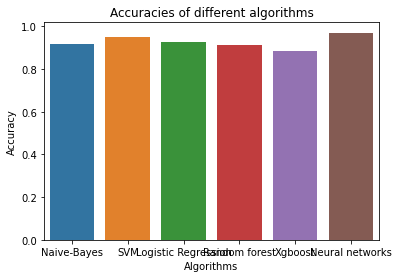

In [37]:
import seaborn as sns
ax=ax = sns.barplot(x="Algorithms", y="Accuracy", data=visual_data)
plt.figure(1,figsize=(12,10))
plt.title('Accuracies of different algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
# plt.legend()
plt.show()


In [40]:
pred=model.predict(X_test)

In [41]:
prediction=[1 if i>0.5 else 0 for i in pred]

In [42]:
prediction=[1 if i>0.5 else 0 for i in pred]

In [61]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
print('confusion matrix for Neural networs \n',cm)
# plot_confusion_matrix(cm)


confusion matrix for Neural networs 
 [[588   0]
 [ 62 190]]


In [74]:
text="admin' -- "   # enter text to test

In [75]:
import numpy as np
text=vectorizer.transform([text])
print("no of categories are:",svm.classes_)
svmpred=svm.predict(text)
print('support vector machine prediction :',svmpred)


support vector machine prediction : [1]


In [77]:
nn_pred=model.predict(text)
nn_result=[1 if i>0.5 else 0 for i in nn_pred]
print('neural networks prediction :',nn_result)

neural networks prediction : [1]
